In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import Conv2D
from keras.applications.resnet50 import ResNet50,preprocess_input
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
from PIL import Image
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline

In [2]:
physical_device=tf.config.experimental.list_physical_devices('GPU')
print("No. of GPUs Available: ",len(physical_device))
tf.config.experimental.set_memory_growth(physical_device[0],True)

No. of GPUs Available:  1


In [3]:
os.chdir('D:/Dataset COVID-19 Augmented')
if os.path.isdir('D:/Dataset COVID-19 Augmented/COVID-19') is False:
    os.makedirs('D:/Dataset COVID-19 Augmented/train/covid')
    os.makedirs('D:/Dataset COVID-19 Augmented/train/noncovid')
    os.makedirs('D:/Dataset COVID-19 Augmented/valid/covid')
    os.makedirs('D:/Dataset COVID-19 Augmented/valid/noncovid')
    os.makedirs('D:/Dataset COVID-19 Augmented/test/covid')
    os.makedirs('D:/Dataset COVID-19 Augmented/test/noncovid')
    
    for i in random.sample(glob.glob('D:/Dataset COVID-19 Augmented/COVID-19/*'),700):
        shutil.move(i,'D:/Dataset COVID-19 Augmented/train/covid')
    for i in random.sample(glob.glob('D:/Dataset COVID-19 Augmented/Non-COVID-19/*'),700):
        shutil.move(i,'D:/Dataset COVID-19 Augmented/train/noncovid')
    for i in random.sample(glob.glob('D:/Dataset COVID-19 Augmented/COVID-19/*'),100):
        shutil.move(i,'D:/Dataset COVID-19 Augmented/valid/covid')
    for i in random.sample(glob.glob('D:/Dataset COVID-19 Augmented/Non-COVID-19/*'),100):
        shutil.move(i,'D:/Dataset COVID-19 Augmented/valid/noncovid')
    for i in random.sample(glob.glob('D:/Dataset COVID-19 Augmented/COVID-19/*'),100):
        shutil.move(i,'D:/Dataset COVID-19 Augmented/test/covid')
    for i in random.sample(glob.glob('D:/Dataset COVID-19 Augmented/Non-COVID-19/*'),100):
        shutil.move(i,'D:/Dataset COVID-19 Augmented/test/noncovid')
os.chdir('../../')

In [4]:
train_path = 'D:/Dataset COVID-19 Augmented/train'
valid_path = 'D:/Dataset COVID-19 Augmented/valid'
test_path = 'D:/Dataset COVID-19 Augmented/test'

In [5]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['covid', 'noncovid'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['covid', 'noncovid'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['covid', 'noncovid'], batch_size=10, shuffle=False)

Found 1400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [6]:
imgs1,labels1=next(test_batches)

In [7]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

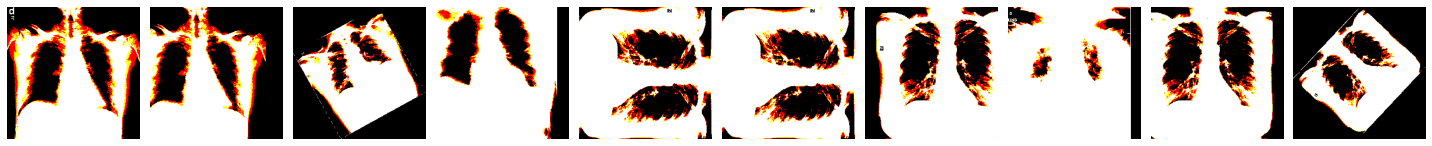

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [8]:
plotImages(imgs1)
print(labels1)

In [9]:
resnet50_model=ResNet50(weights='imagenet',
    include_top=False,
    pooling='avg')

In [10]:
resnet50_model.trainable=False

In [11]:
from tensorflow.keras import layers
model = keras.Sequential([
    resnet50_model,
    layers.Dense(units=2,activation='softmax'),
])


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [13]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(x=train_batches,validation_data=valid_batches,epochs=5,verbose=2)

Epoch 1/5
140/140 - 32s - loss: 0.4480 - accuracy: 0.7993 - val_loss: 0.1427 - val_accuracy: 0.9550
Epoch 2/5
140/140 - 14s - loss: 0.1173 - accuracy: 0.9729 - val_loss: 0.0753 - val_accuracy: 0.9800
Epoch 3/5
140/140 - 14s - loss: 0.0681 - accuracy: 0.9864 - val_loss: 0.0538 - val_accuracy: 0.9850
Epoch 4/5
140/140 - 14s - loss: 0.0487 - accuracy: 0.9886 - val_loss: 0.0408 - val_accuracy: 0.9900
Epoch 5/5
140/140 - 15s - loss: 0.0382 - accuracy: 0.9907 - val_loss: 0.0335 - val_accuracy: 0.9900


In [20]:
import os.path
if os.path.isfile('D:/datasetcollection/models/resnet50.h5') is False:
    model.save('D:/datasetcollection/resnet50.h5')

In [21]:
from tensorflow.keras.models import load_model
new_model=load_model('D:/datasetcollection/resnet50.h5')

In [15]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [16]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [17]:
predictions.shape

(200, 2)

In [18]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

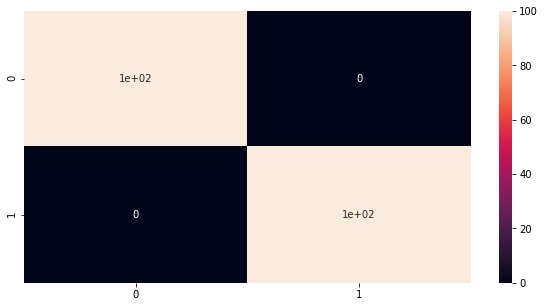

In [19]:
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.heatmap(cm, annot=True)
plt.show()